In [201]:
##-----Library Imports------##
%matplotlib inline

import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np

### Load Shapefile###

In [202]:
# set the filepath and load in a shapefile
fp = "Wards_shp/Wards.shp"
map_df = gpd.read_file(fp)
map_df.head(10)

,OBJECTID,WARD_NAME,WARD_YEAR,Shape_STAr,Shape_STLe,ShapeSTAre,ShapeSTLen,geometry
0,217,61,2016,0,0,1.665393e+08,93184.353989,"POLYGON ((2041940.926 -4045995.198, 2041974.29..."
1,218,100,2016,0,0,1.121129e+08,69591.906001,"POLYGON ((2111050.567 -4049291.618, 2111047.35..."
2,219,86,2016,0,0,4.022435e+06,12266.260191,"POLYGON ((2101304.781 -4044582.961, 2100879.98..."
3,220,85,2016,0,0,4.182490e+06,11355.521156,"POLYGON ((2099091.272 -4042937.921, 2099120.50..."
4,221,83,2016,0,0,6.177509e+06,12809.780372,"POLYGON ((2099091.272 -4042937.921, 2099066.04..."
5,222,64,2016,0,0,2.360016e+07,41386.219005,"POLYGON ((2059960.157 -4041927.236, 2059947.09..."
6,223,68,2016,0,0,2.823585e+06,9852.596179,"POLYGON ((2058639.552 -4038524.205, 2058651.44..."
7,224,82,2016,0,0,4.227422e+06,9829.872158,"POLYGON ((2076064.976 -4038620.528, 2076031.26..."
8,225,98,2016,0,0,2.027606e+06,7061.545617,"POLYGON ((2079891.048 -4036149.175, 2079917.44..."
9,226,81,2016,0,0,4.620336e+06,13282.834430,"POLYGON ((2073085.934 -4036682.883, 2073090.71..."


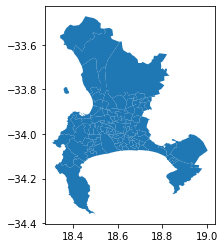

In [203]:
#set coordinate system
map_df = map_df.to_crs(epsg=4326)
map_df.plot()

### Load AirBnB data###

In [204]:
#data to join with the geoframe
data_path = "2-Feature Engineering - All Present.csv"
df = pd.read_csv(data_path, header=0)
df[["longitude"]] = df[["longitude"]].astype("float")
df[["latitude"]] = df[["latitude"]].astype("float")
pd.set_option('display.max_columns', None)
df.head()

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,zipcode,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,host_count_entire,host_count_private,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price,0-49%,100%,50-89%,90-99%,unknown,entire,hotel,private,shared,a few days or more,within a day,within a few hours,within an hour,flexible,luxury_moderate,luxury_super_strict_125,luxury_super_strict_95,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60,amenity_scores
0,3191,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...",Beautiful self catering luxury cottage in cent...,"This is a lovely, separate, self-catering cott...",none,"Mowbray is on the Southern Suburbs line, 6km (...","There are pets on the property. One cat, who w...",The train station is about 400m from the cotta...,Fully self-contained cottage with separate ent...,"I live in the main house on the property, and ...","There is no smoking in the cottage, but you ca...",2008-10-21,I'm single and love to travel and meeting peop...,within an hour,100%,1.0,1.0,1.0,1.0,57.0,62,ZA,South Africa,-33.94739,18.47600,1,21,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Wifi,Air conditioning,Kitchen,Free...",661.0,2656.082216,211.000000,2,0.0,3,730,3,3,730,730,3.0,730.0,1,2,20,50,319,49,7,97.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,0,1,0,moderate,0,0,1,1,0,0,0.610000,6.493754,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2663.663320
1,13044,JAMBO Guest House / Green Room,The Green Room at Jambo Guest House is a sligh...,"Jambo, which means hello in Swahili, is a gues...",The Green Room at Jambo Guest House is a sligh...,none,Green Point is a popular leisure district domi...,Very centrally situated and walking distance t...,A lot of big attractions are within walking di...,Guests will have access to their own private r...,Barry and Mina will be around to ensure you ha...,We expect our guests to be well behaved. Only ...,2009-11-02,We have been running multi Award Winning Jambo...,within an hour,100%,0.0,5.0,1.0,0.0,115.0,125,ZA,South Africa,-33.90771,18.40535,1,3,Hotel room,2,1.0,1.0,1.0,Real Bed,"TV,Wifi,Air conditioning,Breakfast,Free street...",2105.0,0.000000,0.000000,2,0.0,3,30,1,3,30,30,1.1,30.0,1,0,0,0,0,2,0,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0,1,0,strict_14_with_grace_period,0,0,5,0,0,0,0.020000,7.652071,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1459.786779
2,15007,Blaauwberg House,Welcome to our self-catering beach-front famil...,The house sleeps 6 and has all necessary ameni...,Welcome to our self-catering beach-front famil...,none,"Bloubergstrand is a lovely, cosy suburb near C...",Please note we do not provide beach towels at ...,We're located about 25 minutes drive out on th...,Guests have access to the full self-catering h...,"Ingrid, our booking manager, will meet you and...",Please ensure that arrangements are made for y...,2009-12-01,Proud to

In [205]:
##----Drop invalid rows----##
#several samples were outliers in their particular area
df.loc[21952]
df.drop(24155, inplace = True)
df.drop(21137, inplace = True)
df.drop(19884, inplace = True)
#df.drop(21954, inplace = True)
#df.drop(21953, inplace = True)
df.drop(21952, inplace = True)
df.reset_index(drop=True, inplace=True)

In [206]:
df.drop(21953, inplace = True)
df.reset_index(drop=True, inplace=True)

In [207]:
#create reduced dataset
df_reduced = df[["neighbourhood_cleansed", "zipcode", "bedrooms","longitude", "latitude", "price", "log_price"]]

In [208]:
data_for_map = df_reduced.rename(index=str, columns={"neighbourhood_cleansed": "WARD_NAME"})
data_for_map.head()
                                

,WARD_NAME,zipcode,bedrooms,longitude,latitude,price,log_price
0,57.0,62,1.0,18.47600,-33.94739,661.0,6.493754
1,115.0,125,1.0,18.40535,-33.90771,2105.0,7.652071
2,23.0,31,3.0,18.46180,-33.80114,2048.0,7.624619
3,4.0,31,1.0,18.48970,-33.85878,1337.0,7.198184
4,83.0,16,1.0,18.82349,-34.11124,561.0,6.329721


In [209]:
##----Find average price per ward----##
averaged_price = data_for_map[["WARD_NAME", "log_price", "price"]].groupby("WARD_NAME", as_index=False).mean()
averaged_price[["WARD_NAME"]] = averaged_price[["WARD_NAME"]].astype("int")
map_df[["WARD_NAME"]] = map_df[["WARD_NAME"]].astype("int")
averaged_price.tail()

,WARD_NAME,log_price,price
90,111,5.880312,643.714286
91,112,6.770615,1071.109244
92,113,6.528934,1014.687500
93,115,7.102576,1824.488043
94,116,6.475368,712.800000


In [210]:
##----Join the geodataframe with AirBnB data----##
merged = pd.merge(map_df, averaged_price, on='WARD_NAME', how='outer')
sorted_merge = merged.sort_values("price", ascending = False)
sorted_merge.head(10)

,OBJECTID,WARD_NAME,WARD_YEAR,Shape_STAr,Shape_STLe,ShapeSTAre,ShapeSTLen,geometry,log_price,price
86,303,54,2016,0,0,3.538581e+07,52745.967895,"MULTIPOLYGON (((18.39274 -33.90819, 18.39332 -...",7.853484,5930.736115
63,280,62,2016,0,0,3.617195e+07,35038.941080,"POLYGON ((18.47256 -34.00249, 18.47223 -34.003...",7.690323,4662.512329
69,286,52,2016,0,0,9.888483e+05,6118.625797,"POLYGON ((18.54287 -33.94471, 18.54282 -33.946...",8.412721,4504.000000
61,278,40,2016,0,0,1.832310e+06,7248.942548,"POLYGON ((18.58558 -33.98054, 18.58491 -33.981...",8.293800,3999.000000
42,259,74,2016,0,0,3.267025e+07,34233.822448,"POLYGON ((18.40632 -34.00981, 18.40578 -34.011...",7.560196,3696.875221
18,235,78,2016,0,0,4.157799e+06,9492.877318,"POLYGON ((18.61718 -34.04645, 18.61717 -34.046...",8.007367,3003.000000
29,246,71,2016,0,0,5.723147e+07,42950.772105,"POLYGON ((18.40306 -34.01977, 18.40402 -34.019...",7.399234,2591.677570
10,227,69,2016,0,0,4.166491e+07,38527.888990,"POLYGON ((18.41533 -34.11552, 18.41533 -34.115...",7.455444,2549.833962
84,301,77,2016,0,0,1.934715e+07,27257.975367,"POLYGON ((18.44042 -33.93192, 18.44040 -33.932...",7.140069,2134.039186
1,218,100,2016,0,0,1.121129e+08,69591.906001,"POLYGON ((18.96389 -34.15246, 18.96386 -34.152...",7.129235,1996.140162


276.0
5930.736115469093


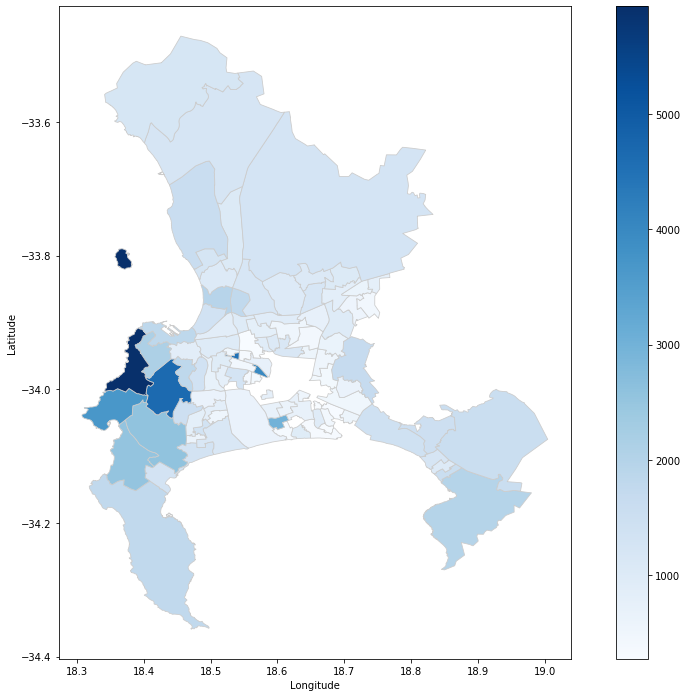

In [211]:
##----Create heatmap according to average price per ward----##

# set a variable that will call whatever column we want to visualise on the map
#variable = "log_price"
variable = "price"
# set the range for the choropleth
#min_price = averaged_price["log_price"].min()
#max_price = averaged_price["log_price"].max()
min_price_2 = averaged_price["price"].min()
max_price_2 = averaged_price["price"].max()
print(min_price_2)
print(max_price_2)
vmin = min_price_2
vmax = max_price_2

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(16, 12)) #10, 16
plt.xlabel("Longitude")
plt.ylabel("Latitude")
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

merged.plot(column=variable, cmap="Blues", linewidth=0.8, ax=ax, edgecolor='0.8')


#https://wazimap.co.za/profiles/ward-19100029-city-of-cape-town-ward-29-19100029/
#for demographic info

In [212]:
fig.savefig("ward_average_price_new.png", dpi=300) #save graph

5.5983808041945275
8.412721169819529


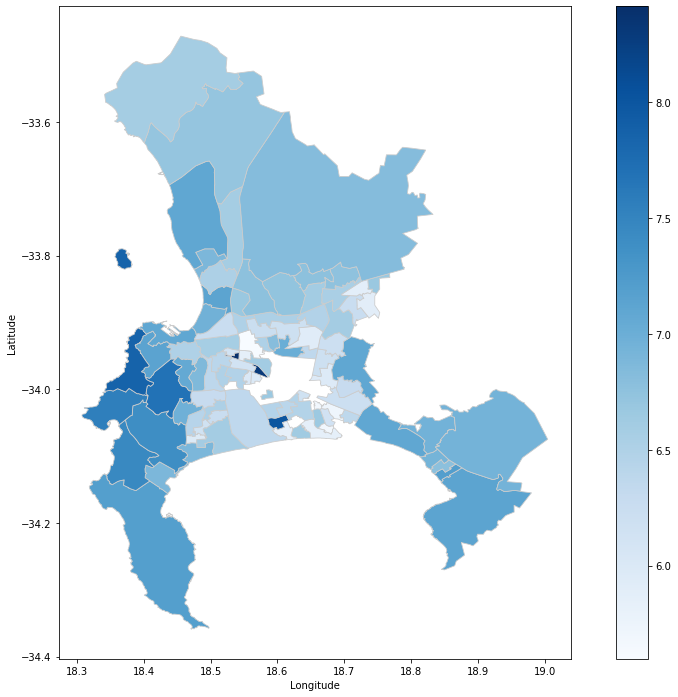

In [213]:
##----Create heatmap according to average log price per ward----##

# set a variable that will call whatever column we want to visualise on the map
variable = "log_price"
# set the range for the choropleth
min_price_2 = averaged_price["log_price"].min()
max_price_2 = averaged_price["log_price"].max()
print(min_price_2)
print(max_price_2)
vmin = min_price_2
vmax = max_price_2

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(16, 12)) #10, 16
plt.xlabel("Longitude")
plt.ylabel("Latitude")
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

merged.plot(column=variable, cmap="Blues", linewidth=0.8, ax=ax, edgecolor='0.8')


In [214]:
fig.savefig("log_price_map_export.png", dpi=300) #save figure

### Create heatmap of income data###

In [215]:
##----Load demographic data----## 
data_path = "demographic_data.csv"
demographic = pd.read_csv(data_path)
demographic = demographic.rename(index=str, columns={"ward": "WARD_NAME"})
demographic[["WARD_NAME"]] = demographic[["WARD_NAME"]].astype("int")
map_df[["WARD_NAME"]] = map_df[["WARD_NAME"]].astype("int")

In [216]:
#merge with AirBnB data
merged2 = pd.merge(map_df, demographic, left_on=['WARD_NAME'],right_on=['WARD_NAME'], how='left')
print(merged2.shape)
merged2.head(10)

(116, 9)


,OBJECTID,WARD_NAME,WARD_YEAR,Shape_STAr,Shape_STLe,ShapeSTAre,ShapeSTLen,geometry,income
0,217,61,2016,0,0,1.665393e+08,93184.353989,"POLYGON ((18.34307 -34.12795, 18.34337 -34.128...",115100
1,218,100,2016,0,0,1.121129e+08,69591.906001,"POLYGON ((18.96389 -34.15246, 18.96386 -34.152...",115100
2,219,86,2016,0,0,4.022435e+06,12266.260191,"POLYGON ((18.87634 -34.11745, 18.87253 -34.119...",29400
3,220,85,2016,0,0,4.182490e+06,11355.521156,"POLYGON ((18.85646 -34.10521, 18.85672 -34.105...",29400
4,221,83,2016,0,0,6.177509e+06,12809.780372,"POLYGON ((18.85646 -34.10521, 18.85623 -34.105...",57300
5,222,64,2016,0,0,2.360016e+07,41386.219005,"POLYGON ((18.50494 -34.09769, 18.50482 -34.097...",230700
6,223,68,2016,0,0,2.823585e+06,9852.596179,"POLYGON ((18.49307 -34.07237, 18.49318 -34.074...",29400
7,224,82,2016,0,0,4.227422e+06,9829.872158,"POLYGON ((18.64961 -34.07309, 18.64931 -34.073...",29400
8,225,98,2016,0,0,2.027606e+06,7061.545617,"POLYGON ((18.68398 -34.05470, 18.68422 -34.054...",29400
9,226,81,2016,0,0,4.620336e+06,13282.834430,"POLYGON ((18.62285 -34.05867, 18.62289 -34.059...",57300


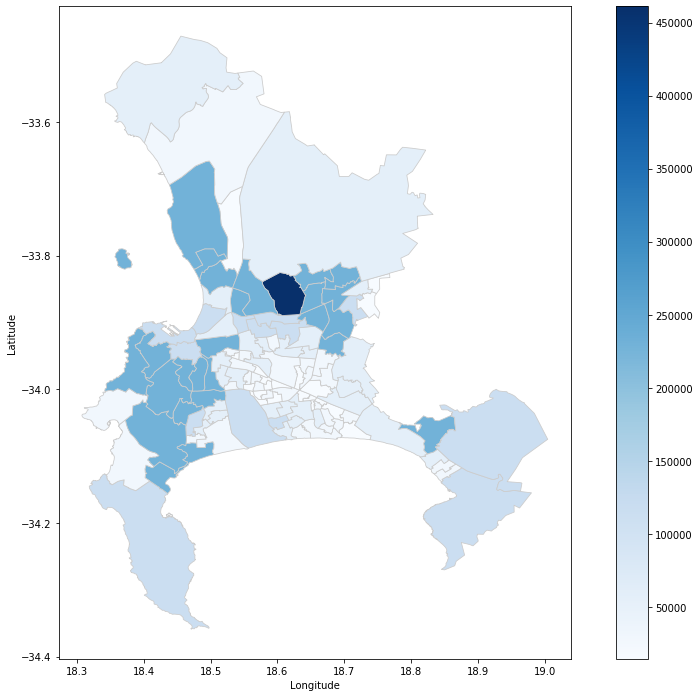

In [217]:
##----Create heatmap according to average household income per ward----##

variable_2 = "income"
# set the range for the choropleth
min_income = demographic["income"].min()
max_income = demographic["income"].max()

vmin = min_income
vmax = max_income
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(16, 12)) #10, 16
plt.xlabel("Longitude")
plt.ylabel("Latitude")
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=vmin, vmax=vmax))
#sm = plt.cm.ScalarMappable(cmap="Blues")
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

merged2.plot(column=variable_2, cmap="Blues", linewidth=0.8, ax=ax, edgecolor='0.8')


In [218]:
fig.savefig("ward_average_income.png", dpi=300) #save figure

### Naive experimentation with proximity to landmarks###

In [219]:
#Distance to V&A according to latitude and longitude coordinates

v_and_a_long = -33.9070
v_and_a_lat = 18.4226
longitudes = df["longitude"].to_numpy()
latitudes = df["latitude"].to_numpy()
"""v_and_a_dists = []
for i in range(0, len(longitudes)):
    lat_diff = latitudes[i]-v_and_a_lat
    long_diff = longitudes[i]-v_and_a_long
    dist_to_v_and_a = np.sqrt(lat_diff+long_diff)
    v_and_a_dists.append(dist_to_v_and_a)"""
#print(v_and_a_dists)
v_and_a_dists = np.sqrt(np.square(longitudes - v_and_a_long) + np.square(latitudes - v_and_a_lat))
                    

df["v_and_a_dists"] = v_and_a_dists
df["log_price"].corr(df["v_and_a_dists"]) 

-0.12022979833365155

In [220]:
#Clifton
#33.9339° S, 18.3770° E
landmark_long = -33.9339
landmark_lat =  18.3770
longitudes = df["longitude"].to_numpy()
latitudes = df["latitude"].to_numpy()
"""v_and_a_dists = []
for i in range(0, len(longitudes)):
    lat_diff = latitudes[i]-v_and_a_lat
    long_diff = longitudes[i]-v_and_a_long
    dist_to_v_and_a = np.sqrt(lat_diff+long_diff)
    v_and_a_dists.append(dist_to_v_and_a)"""
#print(v_and_a_dists)
clifton_dists = np.sqrt(np.square(longitudes - landmark_long) + np.square(latitudes - landmark_lat))
                    

df["clifton_dists"] = clifton_dists
df["log_price"].corr(df["clifton_dists"]) 

-0.12034111921366333

In [221]:
#Camps Bay
#33.9513° S, 18.3831° E
landmark_long = -33.9513
landmark_lat =  18.3831
longitudes = df["longitude"].to_numpy()
latitudes = df["latitude"].to_numpy()
"""v_and_a_dists = []
for i in range(0, len(longitudes)):
    lat_diff = latitudes[i]-v_and_a_lat
    long_diff = longitudes[i]-v_and_a_long
    dist_to_v_and_a = np.sqrt(lat_diff+long_diff)
    v_and_a_dists.append(dist_to_v_and_a)"""
#print(v_and_a_dists)
camps_dists = np.sqrt(np.square(longitudes - landmark_long) + np.square(latitudes - landmark_lat))
                    

df["camps_dists"] = clifton_dists
df["log_price"].corr(df["camps_dists"]) 

-0.12034111921366333

In [222]:
#Table mountain cable car
#33.9483° S, 18.4029° E
landmark_long = -33.9483
landmark_lat =  18.4029
longitudes = df["longitude"].to_numpy()
latitudes = df["latitude"].to_numpy()
"""v_and_a_dists = []
for i in range(0, len(longitudes)):
    lat_diff = latitudes[i]-v_and_a_lat
    long_diff = longitudes[i]-v_and_a_long
    dist_to_v_and_a = np.sqrt(lat_diff+long_diff)
    v_and_a_dists.append(dist_to_v_and_a)"""
#print(v_and_a_dists)
table_dists = np.sqrt(np.square(longitudes - landmark_long) + np.square(latitudes - landmark_lat))
                    

df["table_dists"] = table_dists
df["log_price"].corr(df["table_dists"]) 

-0.12032342958545851

In [223]:
def degreesToRadians(degrees):
    return degrees * np.pi / 180;

def distanceInKmBetweenEarthCoordinates(lat1, lon1, lat2, lon2):
    earthRadiusKm = 6371;
    
    dLat = degreesToRadians(lat2-lat1);
    dLon = degreesToRadians(lon2-lon1);
    
    lat1 = degreesToRadians(lat1);
    lat2 = degreesToRadians(lat2);

    a = np.sin(dLat/2) * np.sin(dLat/2) + np.sin(dLon/2) * np.sin(dLon/2) * np.cos(lat1) * np.cos(lat2); 
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a)); 
    return earthRadiusKm * c;

In [224]:
#calculated distances from difference between coordinates
table_dists = []
landmark_long = -33.9483
landmark_lat =  18.4029
longitudes = df["longitude"].to_numpy()
latitudes = df["latitude"].to_numpy()
for i in range(0, len(longitudes)):
    table_dists.append(distanceInKmBetweenEarthCoordinates(latitudes[i], longitudes[i], landmark_lat,  landmark_long))
                    

df["table_dists"] = table_dists
df["log_price"].corr(df["table_dists"]) 

-0.12532800977037073

In [225]:
clifton_dists = []
landmark_long = -33.9339
landmark_lat =  18.3770
longitudes = df["longitude"].to_numpy()
latitudes = df["latitude"].to_numpy()
for i in range(0, len(longitudes)):
    clifton_dists.append(distanceInKmBetweenEarthCoordinates(latitudes[i], longitudes[i], landmark_lat,  landmark_long))
                    

df["clifton_dists"] = clifton_dists
df["log_price"].corr(df["clifton_dists"]) 

-0.12535154736818474

### Create Map of Distribution of Listings###

In [226]:
from shapely.geometry import Point, Polygon
geometry = [Point(xy) for xy in zip(df["longitude"], df["latitude"])]

In [227]:
#create geo dataframe
#crs = {'init' : 'espc:4326'}
crs = {'init' : 'epsg:4326'}
geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)
geo_df.head()

# designate coordinate system
#crs = {'init':'espc:4326'}
# zip x and y coordinates into single feature
#geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
# create GeoPandas dataframe
#geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,zipcode,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,host_count_entire,host_count_private,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price,0-49%,100%,50-89%,90-99%,unknown,entire,hotel,private,shared,a few days or more,within a day,within a few hours,within an hour,flexible,luxury_moderate,luxury_super_strict_125,luxury_super_strict_95,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60,amenity_scores,v_and_a_dists,clifton_dists,camps_dists,table_dists,geometry
0,3191,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...",Beautiful self catering luxury cottage in cent...,"This is a lovely, separate, self-catering cott...",none,"Mowbray is on the Southern Suburbs line, 6km (...","There are pets on the property. One cat, who w...",The train station is about 400m from the cotta...,Fully self-contained cottage with separate ent...,"I live in the main house on the property, and ...","There is no smoking in the cottage, but you ca...",2008-10-21,I'm single and love to travel and meeting peop...,within an hour,100%,1.0,1.0,1.0,1.0,57.0,62,ZA,South Africa,-33.94739,18.47600,1,21,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Wifi,Air conditioning,Kitchen,Free...",661.0,2656.082216,211.000000,2,0.0,3,730,3,3,730,730,3.0,730.0,1,2,20,50,319,49,7,97.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,0,1,0,moderate,0,0,1,1,0,0,0.610000,6.493754,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2663.663320,74.071550,8038.471946,74.058351,8041.604842,POINT (18.47600 -33.94739)
1,13044,JAMBO Guest House / Green Room,The Green Room at Jambo Guest House is a sligh...,"Jambo, which means hello in Swahili, is a gues...",The Green Room at Jambo Guest House is a sligh...,none,Green Point is a popular leisure district domi...,Very centrally situated and walking distance t...,A lot of big attractions are within walking di...,Guests will have access to their own private r...,Barry and Mina will be around to ensure you ha...,We expect our guests to be well behaved. Only ...,2009-11-02,We have been running multi Award Winning Jambo...,within an hour,100%,0.0,5.0,1.0,0.0,115.0,125,ZA,South Africa,-33.90771,18.40535,1,3,Hotel room,2,1.0,1.0,1.0,Real Bed,"TV,Wifi,Air conditioning,Breakfast,Free street...",2105.0,0.000000,0.000000,2,0.0,3,30,1,3,30,30,1.1,30.0,1,0,0,0,0,2,0,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0,1,0,strict_14_with_grace_period,0,0,5,0,0,0,0.020000,7.652071,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1459.786779,73.993536,8030.617947,73.980322,8033.750919,POINT (18.40535 -33.90771)
2,15007,Blaauwberg House,Welcome to our self-catering beach-front famil...,The house sleeps 6 and has all necessary ameni...,Welcome to our self-catering beach-front famil...,none,"Bloubergstrand is a lovely, cosy suburb near C...",Please note we do not provide beach towels at ...,We're located abou

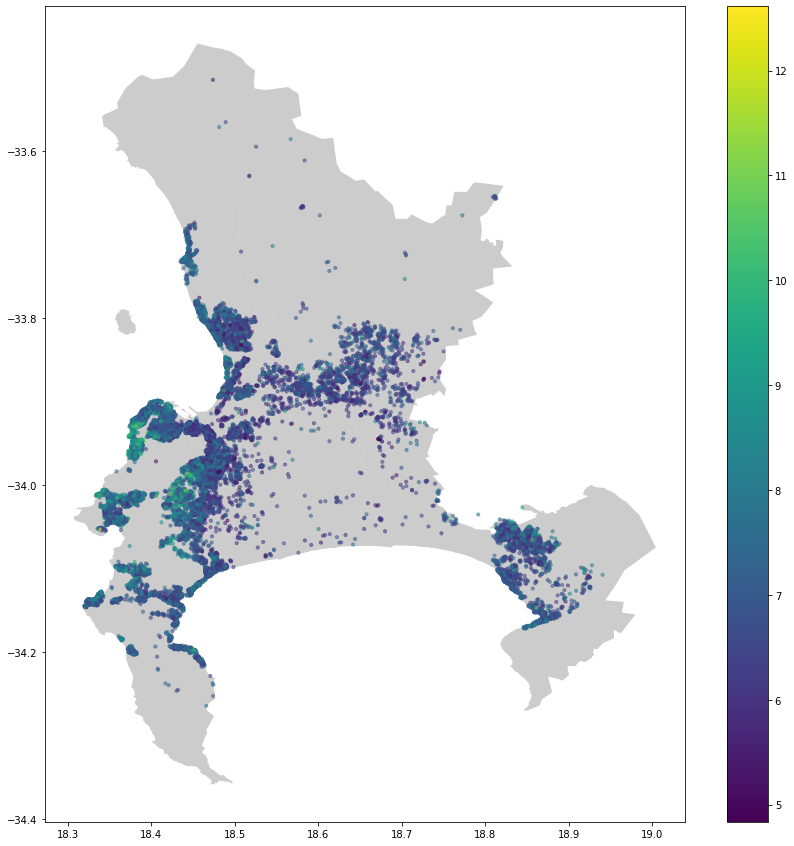

In [228]:
fig, ax = plt.subplots(figsize=(15,15))
map_df.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df.plot(column="log_price",ax=ax,alpha=0.5, legend=True,markersize=10)

In [229]:
fp = "Wards_shp/Wards.shp"
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df = map_df.to_crs(epsg=4326)
map_df.head(10)

,OBJECTID,WARD_NAME,WARD_YEAR,Shape_STAr,Shape_STLe,ShapeSTAre,ShapeSTLen,geometry
0,217,61,2016,0,0,1.665393e+08,93184.353989,"POLYGON ((18.34307 -34.12795, 18.34337 -34.128..."
1,218,100,2016,0,0,1.121129e+08,69591.906001,"POLYGON ((18.96389 -34.15246, 18.96386 -34.152..."
2,219,86,2016,0,0,4.022435e+06,12266.260191,"POLYGON ((18.87634 -34.11745, 18.87253 -34.119..."
3,220,85,2016,0,0,4.182490e+06,11355.521156,"POLYGON ((18.85646 -34.10521, 18.85672 -34.105..."
4,221,83,2016,0,0,6.177509e+06,12809.780372,"POLYGON ((18.85646 -34.10521, 18.85623 -34.105..."
5,222,64,2016,0,0,2.360016e+07,41386.219005,"POLYGON ((18.50494 -34.09769, 18.50482 -34.097..."
6,223,68,2016,0,0,2.823585e+06,9852.596179,"POLYGON ((18.49307 -34.07237, 18.49318 -34.074..."
7,224,82,2016,0,0,4.227422e+06,9829.872158,"POLYGON ((18.64961 -34.07309, 18.64931 -34.073..."
8,225,98,2016,0,0,2.027606e+06,7061.545617,"POLYGON ((18.68398 -34.05470, 18.68422 -34.054..."
9,226,81,2016,0,0,4.620336e+06,13282.834430,"POLYGON ((18.62285 -34.05867, 18.62289 -34.059..."


In [230]:
#Data at 14159 is invalid (id - 34128822)
geo_df["log_price"].idxmax()
geo_df.loc[[14159]]
geo_df.drop(geo_df.index[14159], inplace = True) #invalid row - price is way too high
#must put in other invalid rows here as well eventually
# reset index, because we dropped rows
geo_df.reset_index(drop=True, inplace=True)

In [231]:
geo_df["price"].idxmin()
geo_df.loc[[10560]]

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,zipcode,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,host_count_entire,host_count_private,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price,0-49%,100%,50-89%,90-99%,unknown,entire,hotel,private,shared,a few days or more,within a day,within a few hours,within an hour,flexible,luxury_moderate,luxury_super_strict_125,luxury_super_strict_95,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60,amenity_scores,v_and_a_dists,clifton_dists,camps_dists,table_dists,geometry
10560,20935448,4 bed House in secure central Welgedacht,Our lovely home is situated very centrally in ...,NaN,Our lovely home is situated very centrally in ...,none,NaN,NaN,NaN,NaN,NaN,NaN,2015-06-02,47 year old male Director at investment company,within a day,100%,0.0,2.0,1.0,1.0,70.0,44,ZA,South Africa,-33.86148,18.60565,1,25,Entire home/apt,6,2.5,4.0,5.0,Real Bed,"TV,Wifi,Air conditioning,Pool,Kitchen,Free par...",3003.0,2000.0,350.0,6,250.0,3,1125,3,3,1125,1125,3.0,1125.0,1,0,0,27,117,1,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,strict_14_with_grace_period,0,0,1,1,0,0,0.04,8.007367,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1501.050257,74.102655,8042.067683,74.089561,8045.198393,POINT (18.60565 -33.86148)


### Plot Map of Listings across Cape Town according to Price###

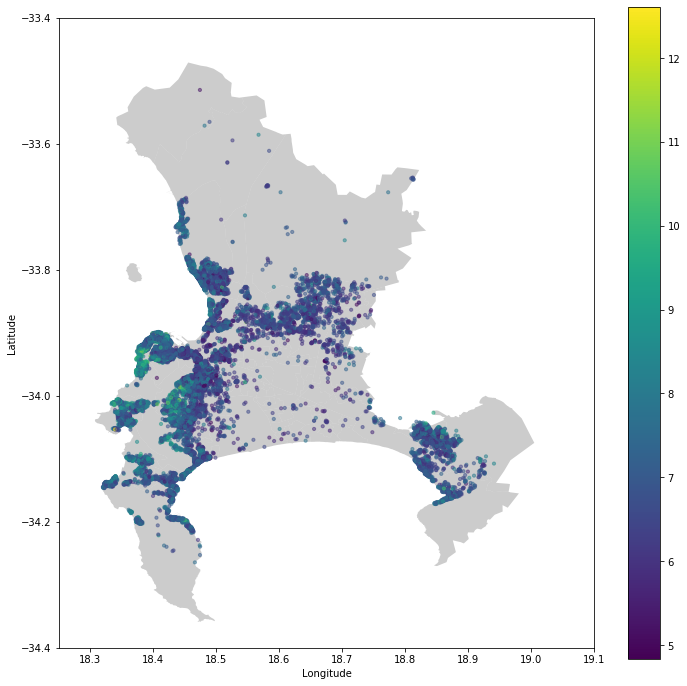

In [232]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(12,12))
# add .shp mapfile to axes
map_df.plot(ax=ax, alpha=0.4,color="grey")
# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(column="log_price", ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
#plt.title("AirBnB Prices in Cape Town", fontsize=15,fontweight="bold")
# set latitiude and longitude boundaries for map display
plt.ylim(-34.4,-33.4)
plt.xlim( 18.25,19.1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
# show map
plt.show()

In [233]:
fig.savefig("price_distribution_no_title.png", dpi=300) #save figure

### Plot Map of Listings in Low Price Bracket###

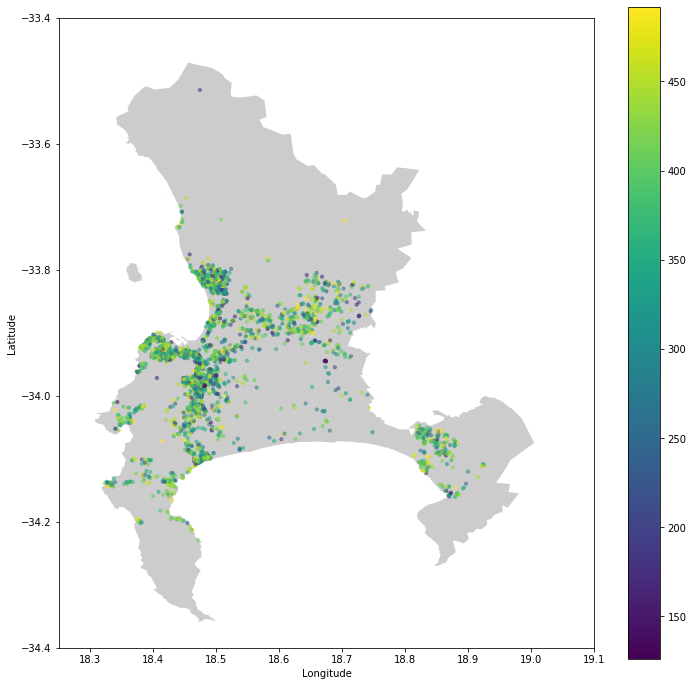

In [234]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(12,12))
# add .shp mapfile to axes
map_df.plot(ax=ax, alpha=0.4,color="grey")
# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df[geo_df['price']<=500].plot(column="price", ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
#plt.title("AirBnB Prices in Cape Town", fontsize=15,fontweight="bold")
# set latitiude and longitude boundaries for map display
#plt.title("AirBnB Prices in Cape Town [Low Price Bracket]", fontsize=15,fontweight="bold")
plt.ylim(-34.4,-33.4)
plt.xlim( 18.25,19.1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
# show map
plt.show()

In [235]:
fig.savefig("low_price_no_title.png", dpi=300) #save map

### Plot Map of Listings in High Price Bracket###

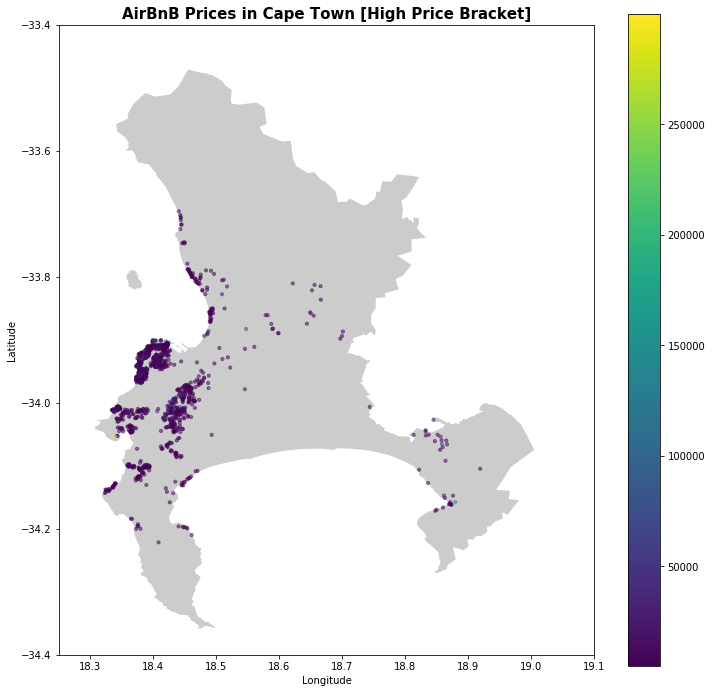

In [236]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(12,12))
# add .shp mapfile to axes
map_df.plot(ax=ax, alpha=0.4,color="grey")
# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df[geo_df['price']>=5000].plot(column="price", ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
#lt.title("AirBnB Prices in Cape Town", fontsize=15,fontweight="bold")
# set latitiude and longitude boundaries for map display
plt.title("AirBnB Prices in Cape Town [High Price Bracket]", fontsize=15,fontweight="bold")
plt.ylim(-34.4,-33.4)
plt.xlim( 18.25,19.1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
# show map
plt.show()

In [237]:
fig.savefig("high_price_with_title.png", dpi=300) #save map